In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

dir_data = './data/samples/Part01/'

f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/samples/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [12]:
age_data = app_train[['DAYS_BIRTH', 'TARGET']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365
#自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = [20,25,30,35,40,45,50,55,60,65,70]
age_data['YEARS_BINNED']=pd.cut(age_data['YEARS_BIRTH'].values,bin_cut,right=False)
age_data['YEARS_BINNED']
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

[35, 40)    42860
[40, 45)    41416
[30, 35)    39439
[45, 50)    35127
[50, 55)    34942
[55, 60)    33132
[25, 30)    32850
[60, 65)    27473
[20, 25)    12150
[65, 70)     8122
Name: YEARS_BINNED, dtype: int64


,DAYS_BIRTH,TARGET,YEARS_BIRTH,YEARS_BINNED
0,9461,1,25.920548,"[25, 30)"
1,16765,0,45.931507,"[45, 50)"
2,19046,0,52.180822,"[50, 55)"
3,19005,0,52.068493,"[50, 55)"
4,19932,0,54.608219,"[50, 55)"


        DAYS_BIRTH  TARGET  YEARS_BIRTH YEARS_BINNED
267160        8553       0    23.432877     [20, 25)
28751         8452       0    23.156164     [20, 25)
147670        8750       0    23.972603     [20, 25)
48367         8226       0    22.536986     [20, 25)
90915         7984       0    21.873973     [20, 25)


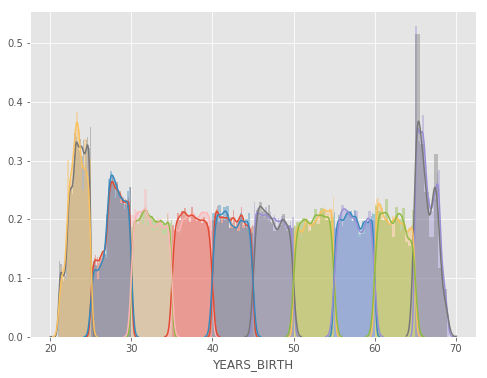

In [39]:
year_group_sorted = age_data.sort_values(by='YEARS_BINNED')
print(year_group_sorted.head())
plt.figure(figsize=(8,6))
year_group_sorted = age_data['YEARS_BINNED'].unique()
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
